## Sales Analysis
          by-SANCHI SINGHAL

##### Dataset:
csv file of monthly sales. Each csv file has order id,product,quantity, price of each product, order date and time and purchase address.

##### Libraries used:
1. numpy
2. pandas
3. matplotlib

##### Step 1:
Concated all csv files of monthly sales into a dataframe.
##### Step 2:
Removed all the missing values from the dataset.
##### Step 3:
Converted certain fields from object to float or int.
##### Step 4:
Obtained the cost for each order id.
##### Step 5:
Find the month of all orders to get the monthly sale of all products.
##### Step 6:
Find the city of all orders to get the count of orders placed in a city.
##### Step 7:
Extracted hour from date and time of order placed to get the count of order placed in a particular hour.
##### Step 8:
To get the number of products sold
##### Step 9:
plot for all products, thier counts and mean of sale

### First of all, import all the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

### Merge the sales data of each and every month into a single .csv file

In [2]:
os.listdir("Dataset") #Here, Enter the location of folder containing the dataset files.

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
Files=[]
for i in os.listdir('Dataset') : #Here, Enter the location of folder containing the dataset files.
    Files.append(i)
for i in Files :
    print(i)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
allData=pd.DataFrame() #Empty DataFrame

for i in Files :
    current_df=pd.read_csv('Dataset/'+i )
    allData=pd.concat([allData,current_df])

print(allData.shape)

(186850, 6)


In [5]:
allData.to_csv('Dataset/allData.csv',index=False)

In [6]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Code to remove missing (Null/NaN) values in the Dataset.

In [7]:
allData.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
allData=allData.dropna()

In [9]:
allData.shape

(186305, 6)

In [10]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Which month is best for selling products?

In [11]:
def month(s) :
    s=s.split('/')
    return s[0]

#Working of month(s)
s='04/19/19 08:46'
month(s)

'04'

In [12]:
allData['Month']=allData['Order Date'].apply(month)

In [13]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [14]:
allData.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [15]:
allData['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [16]:
allData=allData[allData.Month!='Order Date']

In [17]:
allData['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [18]:
allData['Month']=allData['Month'].astype(int)

In [19]:
allData.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [20]:
allData['Quantity Ordered']=allData['Quantity Ordered'].astype(int)
allData['Price Each']=allData['Price Each'].astype(float)

In [21]:
allData.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [22]:
allData['Sale']=allData['Quantity Ordered']*allData['Price Each']

In [23]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [24]:
allData.groupby('Month')['Sale'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sale, dtype: float64

Text(0, 0.5, 'Sales in USD ($)')

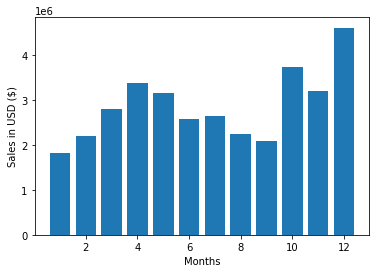

In [25]:
months=range(1,13)
plt.bar(months,allData.groupby('Month')['Sale'].sum())
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')

### Which city orders highest number of products?

In [26]:
def city(s) :
    s=s.split(',')[1]
    return s

#Working of city(s) 
s='669 Spruce St, Los Angeles, CA 90001'
city(s)

' Los Angeles'

In [27]:
allData['City']=allData['Purchase Address'].apply(city)

In [28]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [29]:
allData.groupby('City')['City'].count()

City
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: City, dtype: int64

Text(0, 0.5, 'No of Orders')

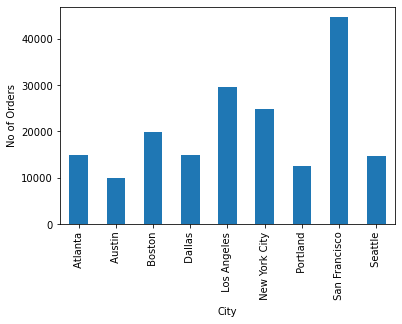

In [30]:
allData.groupby('City')['City'].count().plot.bar()
plt.ylabel('No of Orders')

### At which time of day, the highest number of orders are received?  

In [31]:
allData['Order Date'].dtype #String DataType

dtype('O')

In [32]:
allData['Hour']=pd.to_datetime(allData['Order Date']).dt.hour

In [33]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [34]:
hour=[]
hour.sort()
for i in allData['Hour'] :
    hour.append(i)
hour_=list(set(hour))
print(hour_)

count_=[]
for i in range(24) :
    x=hour.count(hour_[i])
    count_.append(x)
print(count_)
    


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[3910, 2350, 1243, 831, 854, 1321, 2482, 4011, 6256, 8748, 10944, 12411, 12587, 12129, 10984, 10175, 10384, 10899, 12280, 12905, 12228, 10921, 8822, 6275]


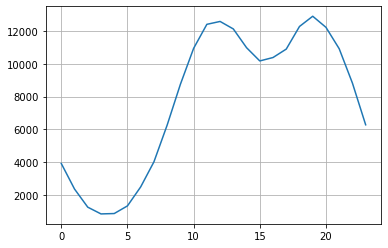

In [35]:
plt.grid()
plt.plot(hour_,count_)

### Which product has the highest demand and why?

<AxesSubplot:xlabel='Product'>

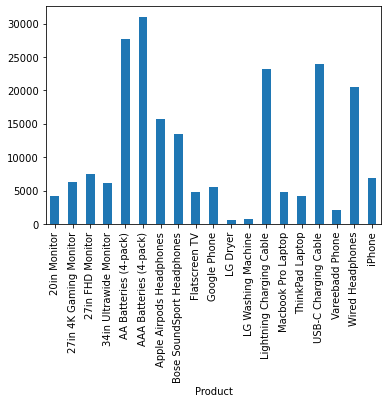

In [36]:
allData.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [37]:
allData.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [38]:
products=allData.groupby('Product')['Quantity Ordered'].sum().index
quantity=allData.groupby('Product')['Quantity Ordered'].sum()
prices=allData.groupby('Product')['Price Each'].mean()

<ipython-input-39-2f17c53ccfc8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 3600x2160 with 0 Axes>

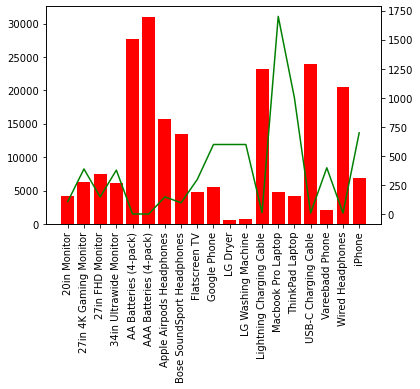

In [39]:
plt.figure(figsize=(50,30))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='r')
ax2.plot(products, prices, 'g')
ax1.set_xticklabels(products, rotation='vertical', size=10)